In [1]:
import pandas as pd
import numpy as np
import string, re

pd.options.display.max_rows = 50



In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords ## TEST
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

# nltk.download('stopwords') ##
# nltk.download('punkt') ##
# nltk.download('wordnet') ##

In [3]:
#CLEAN_DESCRIPTION
data_clean = pd.read_csv('data/data_clean.csv')
data_clean


,CLEAN_DESCRIPTION
0,we work with leaders across sectors to tackle ...
1,cornell is private ivy league university reco...
2,dude let hit the beach and then well hit the b...
3,sun the beach nobel prize winners and souther...
4,attending iowa state university of science and...
...,...
1919,valeo is an automotive supplier partner to all...
1920,for more than eight decades the tennessee vall...
1921,discover your hometown career at the hometown ...
1922,deckers brands is global leader in designing ...


In [4]:
#Entire dataframe 
df = pd.read_csv('data/glassdoor_ratings_main.csv') 
df.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET,CLEAN_DESCRIPTION
0,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1,we work with leaders across sectors to tackle ...
1,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1,cornell is private ivy league university reco...
2,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1,dude let hit the beach and then well hit the b...
3,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1,sun the beach nobel prize winners and souther...
4,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1,attending iowa state university of science and...


## TESTING

### Preprocessing TEST

#### Tokenization

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as n-gram, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here" "David works", "works here"

In [5]:
description = df.iloc[0, 12].lower()
description

'mission: our mission is two-fold: to help our clients make distinctive, lasting, and substantial improvements in their performance; and to build a firm that attracts, develops, excites, and retains exceptional people. these elements are strongly connected. helping clients solve their toughest problems requires the best people, and the best people are drawn to work that matters, together with supportive, dedicated colleagues.'

In [6]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_description = tokenizer.tokenize(description)

In [7]:
fdist = FreqDist(tokenized_description)
print(fdist)

<FreqDist with 47 samples and 62 outcomes>


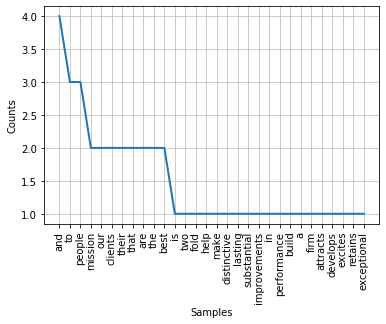

In [8]:
#should I remove capital letters?
plt.figure()
fdist.plot(30)

#### Stop Words

In [9]:
## automatic stop words, but you can add your own words as well
stop_words=set(stopwords.words("english")) 

In [10]:
filtered_description=[]
for w in tokenized_description:
    if w not in stop_words:
        filtered_description.append(w)
print("Filterd Sentence:",filtered_description)

Filterd Sentence: ['mission', 'mission', 'two', 'fold', 'help', 'clients', 'make', 'distinctive', 'lasting', 'substantial', 'improvements', 'performance', 'build', 'firm', 'attracts', 'develops', 'excites', 'retains', 'exceptional', 'people', 'elements', 'strongly', 'connected', 'helping', 'clients', 'solve', 'toughest', 'problems', 'requires', 'best', 'people', 'best', 'people', 'drawn', 'work', 'matters', 'together', 'supportive', 'dedicated', 'colleagues']


In [11]:
## After filtering words, words are now in half
print(len(tokenized_description))
print(len(filtered_description))

62
40


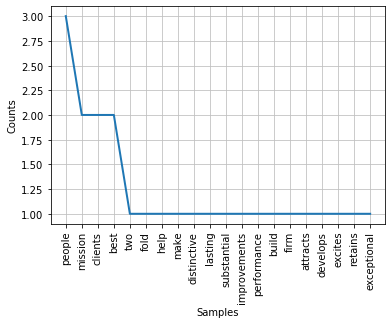

In [12]:
fdist = FreqDist(filtered_description)
plt.figure()
fdist.plot(20)

#### Stemming

In [13]:
from nltk.stem import PorterStemmer

In [14]:
ps = PorterStemmer()

stemmed_description=[]
for w in filtered_description:
    stemmed_description.append(ps.stem(w))

print(stemmed_description)

['mission', 'mission', 'two', 'fold', 'help', 'client', 'make', 'distinct', 'last', 'substanti', 'improv', 'perform', 'build', 'firm', 'attract', 'develop', 'excit', 'retain', 'except', 'peopl', 'element', 'strongli', 'connect', 'help', 'client', 'solv', 'toughest', 'problem', 'requir', 'best', 'peopl', 'best', 'peopl', 'drawn', 'work', 'matter', 'togeth', 'support', 'dedic', 'colleagu']


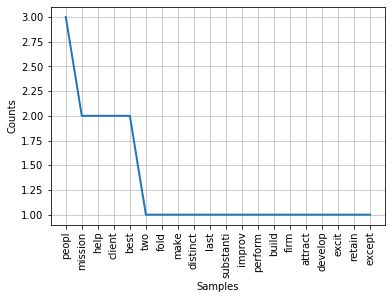

In [15]:
fdist = FreqDist(stemmed_description)
fdist.plot(20)

### Feature Engineering TEST
 - BoW or TF-IDF?

## WORKING

**Preprocessing**

In [16]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation) #appending to stopwords
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '',
            '-', '–', '—', '--', 'e.g', "'ll", "'ve", "'s",
            'company', 'services', 'world', 'people', 'care', 'health', 'us',
           ]
sw_set = set(sw_list) #list of stop words - why do I need to make it a set?
print(sw_set) #Sanity Check
print()
print(sw_list)


{'how', "mustn't", "you'll", '', "haven't", 'up', "isn't", 'doing', 'shan', '!', '.', 'until', 'am', 'where', '#', 'people', 'couldn', 'through', "hadn't", '--', 'here', "''", '...', 'been', ')', 'but', 'only', 'at', 'any', 'if', 'by', 'yourself', 're', "hasn't", 'just', 'for', 'which', 'o', 'their', 'isn', '\\', 'itself', 'ma', 'on', 'did', 'an', "couldn't", "weren't", "won't", 'not', 'after', 'own', 'mustn', '”', 'than', 'few', "that'll", 'hadn', 'shouldn', 'ourselves', 'below', '}', 'above', '""', 'will', 'was', 'and', 'too', "she's", 'haven', '~', 'i', "'ll", '=', 'them', ']', 'some', 'ours', 'they', '+', 'more', 'aren', '—', '(', 'further', '``', 'ain', 'y', ';', 'what', 'should', 'that', 'each', 'are', 'against', 'whom', 's', '$', 'does', 'myself', 'both', 'be', 'who', 'do', 'don', 'these', 'now', 'yours', 'she', 'of', '_', "'", 'those', 'over', 'had', 'off', "aren't", 'once', "you're", "should've", 'e.g', 'down', 'can', 've', 'world', 'd', 'during', 'such', 'in', '?', 'as', 'whe

In [17]:
# def process_description(description):
#     tokens = nltk.word_tokenize(description) #tokenize
#     stopwords_removed = [token for token in tokens if token not in sw_list]
#     return stopwords_removed 

In [18]:
# # applying the above function to our data/features with map() method
# processed_description = list(map(process_description, df.CLEAN_DESCRIPTION))

In [19]:
# processed_description[0]

In [20]:
# lemmatized_output[0]

### EDA

#### Most Frequent Words - EDA

In [21]:
df_freq_inclusive = df[df['TARGET']==1]
df_freq_not_inclusive = df[df['TARGET']==0]

In [22]:
#pulling out the text data from each
data_incl = df_freq_inclusive['CLEAN_DESCRIPTION']
data_not_incl = df_freq_not_inclusive['CLEAN_DESCRIPTION']

In [23]:
def process_description(description):
    tokens = nltk.word_tokenize(description) #tokenize
    stopwords_removed = [token for token in tokens if token not in sw_set]
    return stopwords_removed 

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer(stop_words=sw_set) ## tri-gram and quadro-gram"
# text_tf= tf.fit_transform(df['CLEAN_DESCRIPTION'])
# text_tf.data

In [25]:
# sw_set = set(sw_list) #list of stop words - why do I need to make it a set?
# print(sw_set) #Sanity Check

In [26]:
df.CLEAN_DESCRIPTION

0       we work with leaders across sectors to tackle ...
1       cornell is  private ivy league university reco...
2       dude let hit the beach and then well hit the b...
3       sun the beach nobel prize winners and  souther...
4       attending iowa state university of science and...
                              ...                        
1919    valeo is an automotive supplier partner to all...
1920    for more than eight decades the tennessee vall...
1921    discover your hometown career at the hometown ...
1922    deckers brands is  global leader in designing ...
1923    first american makes the dream of property own...
Name: CLEAN_DESCRIPTION, Length: 1924, dtype: object

In [27]:
# df['CLEAN_DESCRIPTION'] = df['CLEAN_DESCRIPTION'].apply(process_description)

In [28]:
### Figure out how to remove stopwords HERE
# df['CLEAN_DESCRIPTION'] = df['CLEAN_DESCRIPTION'].apply(process_description)

In [29]:
df.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET,CLEAN_DESCRIPTION
0,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1,we work with leaders across sectors to tackle ...
1,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1,cornell is private ivy league university reco...
2,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1,dude let hit the beach and then well hit the b...
3,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1,sun the beach nobel prize winners and souther...
4,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1,attending iowa state university of science and...


In [34]:
# applying the above function to our data/features with map() method
processed_incl = list(map(process_description, data_incl))
processed_not_incl = list(map(process_description, data_not_incl))

In [35]:
processed_incl[0]

['work',
 'leaders',
 'across',
 'sectors',
 'tackle',
 'toughest',
 'challenges',
 'best',
 'grow',
 'startup',
 'improve',
 'early',
 'education',
 'quickly',
 'enter',
 'new',
 'market',
 'serve',
 'organizations',
 'sizes',
 'ranging',
 'smalltomidsized',
 'companies',
 'revenues',
 'less',
 'year',
 'top',
 'companies',
 'forbes',
 'global',
 'list',
 'offices',
 'industry',
 'practices',
 'eight',
 'functional',
 'practices',
 'work',
 'private',
 'sector',
 'serve',
 'governments',
 'completed',
 'projects',
 'social',
 'sector',
 'organizations',
 'last',
 'five',
 'years',
 'means',
 'whatever',
 'passion',
 'find',
 'others',
 'working',
 'similar',
 'topics',
 'mckinsey',
 'know',
 'want',
 'know',
 'want',
 'come',
 'mckinsey',
 'explore',
 'visit',
 'careers',
 'website',
 'learn',
 'apply',
 'subscribe',
 'careers',
 'blog',
 'weekly',
 'job',
 'alerts',
 'stories',
 'colleaguesmission',
 'mission',
 'twofold',
 'help',
 'clients',
 'make',
 'distinctive',
 'lasting',
 's

In [36]:
print('inclusive companies: ', len(processed_incl))
print('non-inclusive companies: ', len(processed_not_incl))

inclusive companies:  1086
non-inclusive companies:  838


In [37]:
total_vocab_NOT_incl = set()
for comment in processed_not_incl:
    total_vocab_NOT_incl.update(comment)
len(total_vocab_NOT_incl)

10851

In [38]:
total_vocab_incl = set()
for comment in processed_incl:
    total_vocab_incl.update(comment)
len(total_vocab_incl)

11666

In [39]:
flat_incl = [item for sublist in processed_incl for item in sublist]
flat_not_incl = [item for sublist in processed_not_incl for item in sublist]

In [40]:
inclusive_freq = FreqDist(flat_incl)
not_inclusive_freq = FreqDist(flat_not_incl)

In [41]:
# Top 20 inclusive words:
inclusive_freq.most_common(20)

[('work', 412),
 ('business', 384),
 ('one', 382),
 ('university', 353),
 ('customers', 350),
 ('new', 301),
 ('solutions', 297),
 ('every', 291),
 ('technology', 283),
 ('best', 282),
 ('employees', 281),
 ('products', 269),
 ('also', 265),
 ('largest', 262),
 ('service', 260),
 ('global', 254),
 ('across', 252),
 ('including', 246),
 ('team', 240),
 ('make', 230)]

In [42]:
# pros_incl = list(map(process_description, data_incl))
# pros_not_incl = list(map(process_description, data_not_incl))

In [43]:
# Top 20 non-inclusive words:
not_inclusive_freq.most_common(20)

[('customers', 335),
 ('solutions', 312),
 ('products', 310),
 ('one', 290),
 ('global', 279),
 ('work', 269),
 ('business', 265),
 ('new', 236),
 ('employees', 233),
 ('also', 208),
 ('leading', 207),
 ('every', 205),
 ('service', 198),
 ('including', 191),
 ('technology', 190),
 ('across', 188),
 ('largest', 180),
 ('clients', 177),
 ('help', 176),
 ('university', 174)]

#### Normalized word frequencies:

In [44]:
#Inclusive
inclusive_total_word_count = sum(inclusive_freq.values())
inclusive_top_25 = inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in inclusive_top_25:
    normalized_frequency = word[1]/inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

work 		 0.005055
business 		 0.004711
one 		 0.004687
university 		 0.004331
customers 		 0.004294
new 		 0.003693
solutions 		 0.003644
every 		 0.00357
technology 		 0.003472
best 		 0.00346
employees 		 0.003448
products 		 0.0033
also 		 0.003251
largest 		 0.003215
service 		 0.00319
global 		 0.003116
across 		 0.003092
including 		 0.003018
team 		 0.002945
make 		 0.002822
mission 		 0.00281
companies 		 0.002736
leading 		 0.002712
help 		 0.00265
financial 		 0.002589


In [45]:
#Not inclusive
not_inclusive_total_word_count = sum(not_inclusive_freq.values())
not_inclusive_top_25 = not_inclusive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in not_inclusive_top_25:
    normalized_frequency = word[1]/not_inclusive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

customers 		 0.005273
solutions 		 0.004911
products 		 0.004879
one 		 0.004565
global 		 0.004391
work 		 0.004234
business 		 0.004171
new 		 0.003715
employees 		 0.003667
also 		 0.003274
leading 		 0.003258
every 		 0.003227
service 		 0.003116
including 		 0.003006
technology 		 0.002991
across 		 0.002959
largest 		 0.002833
clients 		 0.002786
help 		 0.00277
university 		 0.002739
management 		 0.002644
mission 		 0.002597
life 		 0.002503
make 		 0.002503
industry 		 0.002471


#### Visualization
- Bar Chart

In [ ]:
# create counts of satire and not satire with values and words
inclusive_bar_counts = [x[1] for x in inclusive_freq.most_common(25)]
inclusive_bar_words = [x[0] for x in inclusive_freq.most_common(25)]

not_inclusive_bar_counts = [x[1] for x in not_inclusive_freq.most_common(25)]
not_inclusive_bar_words = [x[0] for x in not_inclusive_freq.most_common(25)]

In [ ]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

In [ ]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(inclusive_bar_words, inclusive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_inclusive_bar_words, not_inclusive_bar_counts, color=color )

ax.title.set_text('Inclusive')
ax2.title.set_text('Not Inclusive')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

#### Visualization 
- Word Clouds

In [ ]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
inclusive_dictionary = dict(zip(inclusive_bar_words, inclusive_bar_counts))
not_inclusive_dictionary = dict(zip(not_inclusive_bar_words, not_inclusive_bar_counts))

In [ ]:
not_inclusive_dictionary

In [ ]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(inclusive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [ ]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_inclusive_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

What about in ONLY inclusive/not inclusive companies?

In [ ]:
def returnNotMatches(a, b):
    return [x for x in a if x not in b]

In [ ]:
returnNotMatches(flat_incl, flat_not_incl)

### EDA

In [69]:
df.head()

,SIZE,LOCATION_HQ,INDUSTRY,RATING_OVERALL,RATING_DI,RATING_CV,RATING_WL,RATING_SM,RATING_CB,RATING_CO,NUM_REVIEWS,DESCRIPTION,MISSION,FULL_DESCRIPTION,TARGET,CLEAN_DESCRIPTION
0,10000+ Employees,"New York, NY",Consulting,4.5,4.4,4.4,3.0,4.1,4.4,4.5,5198,We work with leaders across sectors to tackle ...,Mission: Our mission is two-fold: to help our ...,We work with leaders across sectors to tackle ...,1,we work with leaders across sectors to tackle ...
1,10000+ Employees,"Ithaca, NY",Colleges & Universities,4.5,4.3,4.4,4.0,4.1,4.1,4.2,1765,"Cornell is a private, Ivy League university re...",,"Cornell is a private, Ivy League university re...",1,cornell is private ivy league university reco...
2,5001 to 10000 Employees,"Santa Barbara, CA",Colleges & Universities,4.5,4.2,4.3,4.4,4.1,3.7,4.0,1049,"Dude, let's hit the beach! And then we'll hit ...",,"Dude, let's hit the beach! And then we'll hit ...",1,dude let hit the beach and then well hit the b...
3,10000+ Employees,"Irvine, CA",Colleges & Universities,4.4,4.5,4.3,4.0,4.0,3.8,4.0,1398,"Sun, the beach, Nobel Prize winners, and a Sou...",,"Sun, the beach, Nobel Prize winners, and a Sou...",1,sun the beach nobel prize winners and souther...
4,5001 to 10000 Employees,"Ames, IA",Colleges & Universities,4.4,4.2,4.2,4.2,4.0,3.8,3.9,1203,Attending Iowa State University of Science and...,,Attending Iowa State University of Science and...,1,attending iowa state university of science and...


In [75]:
dtm = pd.read_csv('data/dtm.csv')

In [96]:
data = dtm.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeeoverify,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aamc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Find the top 30 words used by each company
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('best', 3),
  ('work', 3),
  ('careers', 2),
  ('clients', 2),
  ('serve', 2),
  ('mckinsey', 2),
  ('want', 2),
  ('organizations', 2),
  ('toughest', 2),
  ('companies', 2),
  ('know', 2),
  ('practices', 2),
  ('sector', 2),
  ('market', 1),
  ('requires', 1),
  ('find', 1),
  ('forbes', 1),
  ('less', 1),
  ('quickly', 1),
  ('drawn', 1),
  ('helping', 1),
  ('revenues', 1),
  ('eight', 1),
  ('colleagues', 1),
  ('colleaguesmission', 1),
  ('smalltomidsized', 1),
  ('lasting', 1),
  ('problems', 1),
  ('completed', 1),
  ('distinctive', 1)],
 1: [('new', 3),
  ('york', 3),
  ('cornell', 3),
  ('university', 2),
  ('research', 2),
  ('campuses', 2),
  ('well', 1),
  ('main', 1),
  ('staff', 1),
  ('diversity', 1),
  ('employer', 1),
  ('leadingedge', 1),
  ('unparalleled', 1),
  ('landgrant', 1),
  ('located', 1),
  ('open', 1),
  ('public', 1),
  ('urban', 1),
  ('doha', 1),
  ('reach', 1),
  ('globe', 1),
  ('innovative', 1),
  ('league', 1),
  ('private', 1),
  ('state', 1

In [98]:
tdm.columns

RangeIndex(start=0, stop=1924, step=1)

In [99]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words
words = []
for company in tdm.columns:
    top = [word for (word, count) in top_dict[company]]
    for t in top:
        words.append(t)
        
words

['best',
 'work',
 'careers',
 'clients',
 'serve',
 'mckinsey',
 'want',
 'organizations',
 'toughest',
 'companies',
 'know',
 'practices',
 'sector',
 'market',
 'requires',
 'find',
 'forbes',
 'less',
 'quickly',
 'drawn',
 'helping',
 'revenues',
 'eight',
 'colleagues',
 'colleaguesmission',
 'smalltomidsized',
 'lasting',
 'problems',
 'completed',
 'distinctive',
 'new',
 'york',
 'cornell',
 'university',
 'research',
 'campuses',
 'well',
 'main',
 'staff',
 'diversity',
 'employer',
 'leadingedge',
 'unparalleled',
 'landgrant',
 'located',
 'open',
 'public',
 'urban',
 'doha',
 'reach',
 'globe',
 'innovative',
 'league',
 'private',
 'state',
 'combination',
 'thrive',
 'inclusion',
 'spans',
 'ivy',
 'santa',
 'faculty',
 'five',
 'university',
 'barbara',
 'school',
 'home',
 'ucsb',
 'hit',
 'california',
 'system',
 'students',
 'manual',
 'prize',
 'economics',
 'joined',
 'normal',
 'dude',
 'mountains',
 'members',
 'beach',
 'offering',
 'los',
 'nearly',
 'gradu

In [101]:
# Let's aggregate this list and identify the most common words along with how many companies use them
Counter(words).most_common()

[('business', 303),
 ('products', 296),
 ('every', 275),
 ('technology', 268),
 ('solutions', 267),
 ('employees', 262),
 ('largest', 238),
 ('work', 233),
 ('global', 212),
 ('best', 211),
 ('help', 205),
 ('make', 195),
 ('well', 194),
 ('across', 191),
 ('clients', 188),
 ('customers', 183),
 ('years', 180),
 ('offers', 177),
 ('communities', 175),
 ('new', 174),
 ('home', 162),
 ('better', 162),
 ('leading', 161),
 ('companies', 159),
 ('operates', 159),
 ('university', 158),
 ('experience', 158),
 ('industry', 155),
 ('one', 155),
 ('mission', 150),
 ('around', 147),
 ('million', 147),
 ('financial', 146),
 ('medical', 142),
 ('members', 140),
 ('system', 137),
 ('innovative', 136),
 ('group', 135),
 ('team', 134),
 ('founded', 133),
 ('innovation', 132),
 ('community', 129),
 ('provide', 129),
 ('management', 129),
 ('center', 128),
 ('service', 127),
 ('career', 126),
 ('opportunities', 125),
 ('north', 125),
 ('students', 124),
 ('provides', 122),
 ('committed', 121),
 ('americ

In [111]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(unique_list)), columns=['unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_unique_sort[:50]

,unique_words
544,294
1226,264
538,262
1437,258
46,246
1583,246
1692,242
455,230
1516,208
929,203


In [112]:
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

In [113]:
total_list

[114,
 60,
 62,
 59,
 63,
 64,
 58,
 95,
 38,
 38,
 59,
 136,
 34,
 63,
 64,
 61,
 59,
 55,
 60,
 99,
 77,
 71,
 36,
 38,
 47,
 59,
 107,
 67,
 55,
 78,
 65,
 55,
 87,
 30,
 44,
 65,
 37,
 83,
 74,
 61,
 61,
 59,
 58,
 65,
 67,
 116,
 351,
 57,
 69,
 110,
 41,
 55,
 96,
 83,
 97,
 76,
 30,
 73,
 70,
 90,
 38,
 127,
 44,
 58,
 60,
 57,
 98,
 59,
 61,
 36,
 60,
 89,
 160,
 52,
 71,
 136,
 53,
 90,
 60,
 131,
 45,
 48,
 61,
 46,
 66,
 56,
 63,
 57,
 57,
 75,
 63,
 56,
 115,
 66,
 95,
 71,
 41,
 37,
 81,
 52,
 9,
 58,
 57,
 104,
 78,
 61,
 54,
 78,
 64,
 44,
 58,
 124,
 104,
 35,
 49,
 73,
 68,
 84,
 42,
 86,
 25,
 83,
 41,
 48,
 54,
 72,
 57,
 165,
 62,
 66,
 33,
 76,
 74,
 84,
 53,
 63,
 62,
 87,
 36,
 80,
 82,
 46,
 82,
 114,
 72,
 80,
 100,
 120,
 65,
 78,
 81,
 113,
 84,
 102,
 139,
 112,
 62,
 107,
 82,
 60,
 60,
 37,
 28,
 27,
 83,
 82,
 88,
 25,
 39,
 72,
 26,
 52,
 102,
 91,
 55,
 68,
 117,
 29,
 55,
 60,
 65,
 59,
 82,
 22,
 47,
 51,
 63,
 48,
 110,
 63,
 128,
 38,
 55,
 87,
 131

In [ ]:
# Let's add some columns to our dataframe
data_words['total_words'] = total_list

In [46]:
##CORPUS:
#define features and target
data = df['FULL_DESCRIPTION'] 
target = df['TARGET']

In [ ]:
# applying the above function to our data/features with map() method
processed_description = list(map(process_description, df.CLEAN_DESCRIPTION))

In [53]:
##Lemmatizer
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_description:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [54]:
#defining X_lem for modeling process
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
#X_lem[0] #Sanity Check

**Train-Test Split:**

In [55]:
len(y_lem)

1924

In [114]:
len(X_lem)

['work leader across sector tackle toughest challenge best grow startup improve early education quickly enter new market serve organization size ranging smalltomidsized company revenue le year top company forbes global list office industry practice eight functional practice work private sector serve government completed project social sector organization last five year mean whatever passion find others working similar topic mckinsey know want know want come mckinsey explore visit career website learn apply subscribe career blog weekly job alert story colleaguesmission mission twofold help client make distinctive lasting substantial improvement performance build firm attracts develops excites retains exceptional element strongly connected helping client solve toughest problem requires best best drawn work matter together supportive dedicated colleague',
 'cornell private ivy league university recognized leadingedge employer exemplary research university main campus located ithaca new yo

In [65]:
import pickle

In [67]:
#Save these for modeling

# pickle these for modeling
pickle_out = open('modeling/X_lem.pkl','wb')
pickle.dump(X_lem, pickle_out)
pickle_out.close()

In [68]:
y_lem.to_pickle('modeling/y_lem.pkl')

In [57]:
# always train-test split THEN apply vectorizer 
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_list, #try sw_set?
                       ngram_range=(1,3)) ## TEST remove stopwords, turn into uppercase, bigram/trigram

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

#
tfidf_data_train_lem


<1539x209674 sparse matrix of type '<class 'numpy.float64'>'
	with 315219 stored elements in Compressed Sparse Row format>

### Baseline model - code along with lecture (these are in the modeling notebook)
- Random Forest with Lemmatization, trigrams
- **try also with BoW instead of TF-IDF??**
- **try also with Stemming instead of Lemmatization??** 

2/10 Results:
- Testing Accuracy: 0.5662
- Testing Precision: 0.5437
- Testing Recall: 0.4807
- F1 Score: 0.5103


In [ ]:
## Vectorize here? ##

### Classify (RF/Lem)
- Testing Accuracy: 0.5196
- F1 Score: 0.5455

In [59]:
# TEST
rf_classifier_lem = RandomForestClassifier(n_estimators=120, random_state=0)


In [60]:
## Fit model to train set
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [61]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_precision_score_lem = metrics.precision_score(y_test_lem, rf_test_preds_lem)
rf_recall_score_lem = metrics.recall_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)

print('Random Forest with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print("Testing Precision: {:.4}".format(rf_precision_score_lem))
print("Testing Recall: {:.4}".format(rf_recall_score_lem))
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features:

Testing Accuracy: 0.5455
Testing Precision: 0.5824
Testing Recall: 0.7227
F1 Score: 0.645


In [62]:
#null accuracy (??)
df.TARGET.value_counts(normalize=True)
df.TARGET.value_counts()

1    1086
0     838
Name: TARGET, dtype: int64

(2.0, 0.0)

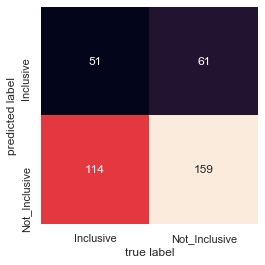

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Inclusive', 'Not_Inclusive'], yticklabels=['Inclusive', 'Not_Inclusive'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

### Next model
- RF with Stemming

In [126]:
! pip install lazypredict

  Using cached lazypredict-0.2.8-py2.py3-none-any.whl (12 kB)
  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
  Using cached scikit_learn-0.23.1-cp36-cp36m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached xgboost-1.1.1-py3-none-macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl (1.1 MB)
  Using cached pandas-1.0.5-cp36-cp36m-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl (679 kB)
ERROR: Could not find a version that satisfies the requirement scipy==1.6.0 (from lazypredict) (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0rc2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0b1, 1.0.0rc1, 1.0.0rc

In [125]:

! pip install scipy --upgrade

ERROR: unknown command "remove"


In [127]:
import scipy
scipy.__version__

'1.5.0'

In [124]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')
import time 
from sklearn.datasets import load_iris,fetch_california_housing
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

ModuleNotFoundError: No module named 'lazypredict'

Stretch:
- Sentiment analysis